In [41]:
# General
import pandas as pd
import numpy as np

# to get stock prices
import pandas.io.data as pdweb
import datetime

# The stats library
from scipy import stats

# plotting modules and libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

# Other
from numpy.random import randn

### Will get some stock prices to work on it

In [10]:
theSymbols = ['INTC', 'TXN', 'TSM', 'QCOM']

In [11]:
stockData = pdweb.get_data_yahoo(theSymbols, 
                                start = datetime.datetime(2014,1,1),
                                end = datetime.datetime(2016,6,30))['Adj Close']
stockData.head()

,INTC,QCOM,TSM,TXN
Date,,,,
2014-01-02,23.670141,67.715145,15.667759,40.112455
2014-01-03,23.660963,67.318016,15.485045,40.289287
2014-01-06,23.367265,67.142538,15.439366,39.954240
2014-01-07,23.486580,67.641259,15.448502,39.740183
2014-01-08,23.339732,68.047626,15.612945,40.289287


In [17]:
len(stockData.columns)

4

In [64]:
intelDataReturns = stockData[[0]].pct_change().dropna()
qualDataReturns = stockData[[1]].pct_change().dropna()
taiwanDataReturns = stockData[[2]].pct_change().dropna()
texasDataReturns = stockData[[3]].pct_change().dropna()

(array([  0.17333141,   0.        ,   0.        ,   0.        ,
          0.51999422,   0.51999422,   1.90664548,   5.89326785,
         18.19979778,  27.38636237,  30.85299051,  15.25316385,
          5.54660504,   1.21331985,   0.69332563,   0.17333141,
          0.17333141,   0.17333141,   0.        ,   0.17333141]),
 array([-0.09102021, -0.08183344, -0.07264666, -0.06345989, -0.05427311,
        -0.04508633, -0.03589956, -0.02671278, -0.01752601, -0.00833923,
         0.00084754,  0.01003432,  0.01922109,  0.02840787,  0.03759464,
         0.04678142,  0.05596819,  0.06515497,  0.07434174,  0.08352852,
         0.09271529]),
 <a list of 20 Patch objects>)

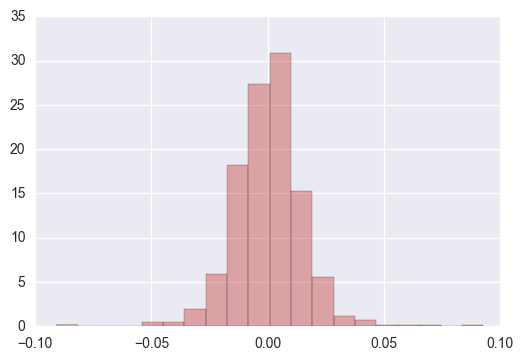

In [71]:
plt.hist(intelDataReturns.values, bins=20, color='indianred', normed=True, alpha=0.5)

(array([   2.,    0.,    3.,    6.,   20.,   46.,  109.,  221.,  139.,
          59.,   11.,    6.,    4.,    1.,    0.,    0.,    0.,    0.,
           0.,    1.]),
 array([-0.07127333, -0.06174627, -0.05221921, -0.04269216, -0.0331651 ,
        -0.02363805, -0.01411099, -0.00458394,  0.00494312,  0.01447018,
         0.02399723,  0.03352429,  0.04305134,  0.0525784 ,  0.06210545,
         0.07163251,  0.08115957,  0.09068662,  0.10021368,  0.10974073,
         0.11926779]),
 <a list of 20 Patch objects>)

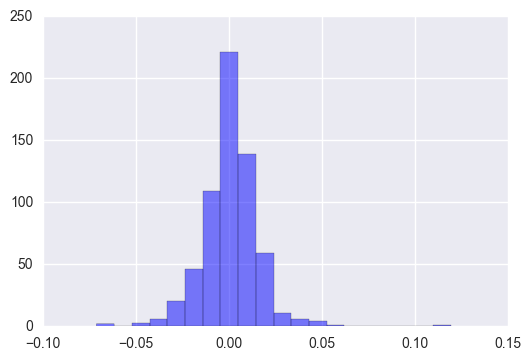

In [72]:
plt.hist(texasDataReturns.values, bins=20, color='blue', alpha=0.5)

(array([   2.,    0.,    3.,    6.,   20.,   46.,  109.,  221.,  139.,
          59.,   11.,    6.,    4.,    1.,    0.,    0.,    0.,    0.,
           0.,    1.]),
 array([-0.07127333, -0.06174627, -0.05221921, -0.04269216, -0.0331651 ,
        -0.02363805, -0.01411099, -0.00458394,  0.00494312,  0.01447018,
         0.02399723,  0.03352429,  0.04305134,  0.0525784 ,  0.06210545,
         0.07163251,  0.08115957,  0.09068662,  0.10021368,  0.10974073,
         0.11926779]),
 <a list of 20 Patch objects>)

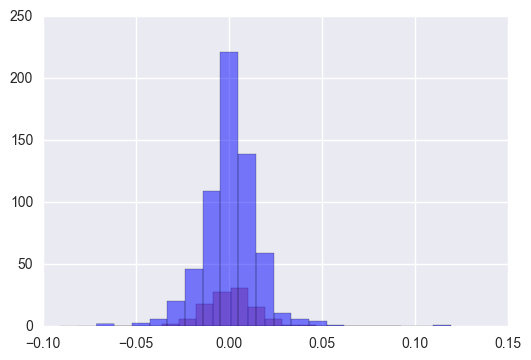

In [73]:
plt.hist(intelDataReturns.values, bins=20, color='indianred', normed=True, alpha=0.5)
plt.hist(texasDataReturns.values, bins=20, color='blue', alpha=0.5)

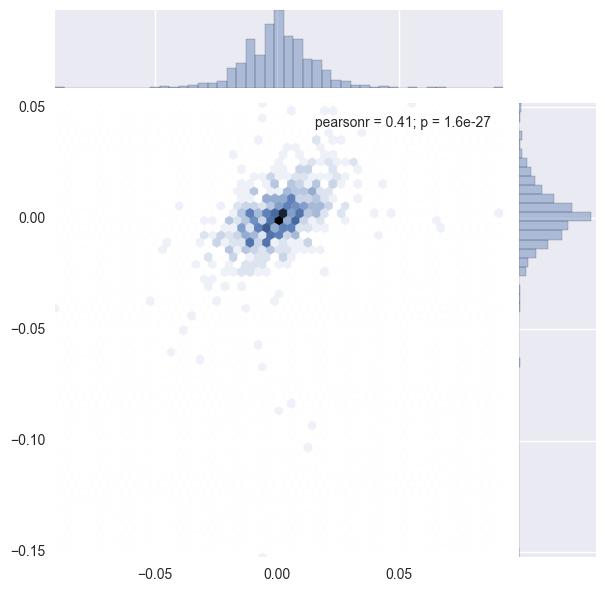

In [79]:
sns.jointplot(intelDataReturns.values, qualDataReturns.values, kind='hex')

In [82]:
stockDataReturns = stockData.pct_change()

In [83]:
stockDataReturns.head()

,INTC,QCOM,TSM,TXN
Date,,,,
2014-01-02,NaN,NaN,NaN,NaN
2014-01-03,-0.000388,-0.005865,-0.011662,0.004408
2014-01-06,-0.012413,-0.002607,-0.002950,-0.008316
2014-01-07,0.005106,0.007428,0.000592,-0.005358
2014-01-08,-0.006252,0.006008,0.010645,0.013817


In [87]:
stockCorr = stockDataReturns.corr()
stockCorr

,INTC,QCOM,TSM,TXN
INTC,1.000000,0.414898,0.433145,0.654229
QCOM,0.414898,1.000000,0.422343,0.451136
TSM,0.433145,0.422343,1.000000,0.517123
TXN,0.654229,0.451136,0.517123,1.000000


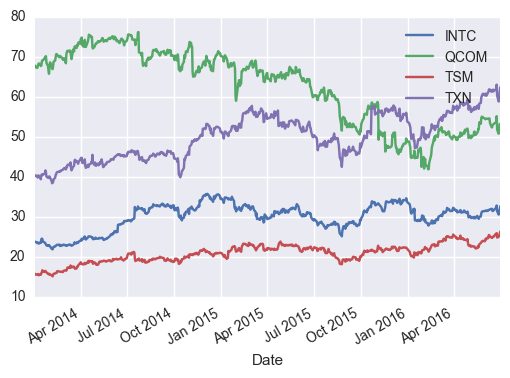

In [85]:
stockData.plot()

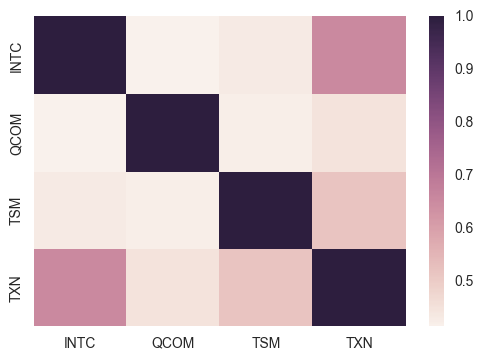

In [88]:
sns.heatmap(stockCorr)